### Этапы работы:

1) Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.

2) Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.

3) Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.

4) Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp).

5) Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).

6) Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально). Напишите вывод.

In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()

Исключим из датасета Iris Setosa и преобразуем целевой признаки из 1 и 2 в 0 и 1

In [3]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
X=iris.data[iris.target != 0]
y=iris.target[iris.target != 0]
y=np.asarray([0 if x==1 else 1 for x in y])

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Обучим модель, используя библотечную реализацию LogisticRegression. Она будет выполнять роль контрольного значения для сравнения метрик.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [7]:
lr = LogisticRegression(max_iter=100, tol=0.05)

In [8]:
start_time = time.time()
lr.fit(X_train, y_train)
lib_end_time = time.time() - start_time
print(f'Время работы библиотечной LogisticRegression = {lib_end_time:.3f}')

Время работы библиотечной LogisticRegression = 0.025


In [9]:
lib_predict = lr.predict(X_test)
lib_score = accuracy_score(y_test, lib_predict)
print(f'Точность предсказания = {lib_score}')

Точность предсказания = 0.9


### Реализуем логистическую регрессию, без использования метода LogisticRegression из библиотеки
x += - learning_rate * dx

In [10]:
def sigmoid(z):
  """Расчёт логистической функции"""
  return (1 / (1 + np.exp(-z)))

In [11]:
def loss(predict, y):
  """Расчёт функции потерь на основе бинарной кросс-энтропии"""
  return ((-y) * np.log(predict) - (1 - y) * np.log(1 - predict)).mean()

In [12]:
def transposition(X):
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    return X

In [13]:
def predict_proba(X, theta, fit_intercept=True):
  """Предсказание вероятности"""
  if len(theta) - 1 == X.shape[1]:
      transposition(X)
  z = np.dot(X, theta)
  return sigmoid(z)

In [14]:
def predict(prediction_proba, rate=0.5):
  """Предсказание класса на основе вероятностей"""
  return np.asarray([0 if x < rate else 1 for x in prediction_proba])

In [15]:
def hand_lr_model(X, y, fit_intercept=True, max_iter=100, learning_rate=0.01, eps=0.000001):
    """Градиентный спуск"""
    if fit_intercept is True:
        transposition(X)
    theta = np.ones(X.shape[1])
    costs = []
    preds = []
    for i in range(max_iter):

        prediction = predict_proba(X, theta) # Предсказание значений
        gradient = np.dot(X.T, (prediction - y)) / y.size # Рассчёт градиента
        theta -= learning_rate * gradient # Сдвиг оценки коэффициентов
        
        preds.append(prediction)
        costs.append(loss(prediction, y))
        
        if i > 0:
          if abs(costs[-1] - costs[-2]) < eps:
            break
    return  theta, costs, prediction

In [16]:
start_time = time.time()
hand_model = hand_lr_model(X_train, y_train, max_iter=100, learning_rate=0.05)
hand_end_time = time.time() - start_time
print(f'Время работы небиблиотечной реализации = {hand_end_time:.3f}')

Время работы небиблиотечной реализации = 0.025


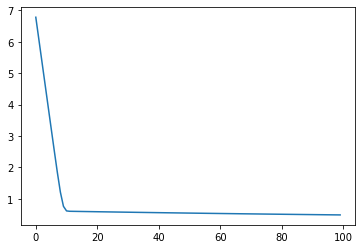

In [17]:
plt.plot(hand_model[1])
plt.show()

In [18]:
hand_predict = predict(predict_proba(X_test,hand_model[0]))
hand_score = accuracy_score(y_test, hand_predict)
print(f'Точность предсказания = {hand_score}')

Точность предсказания = 0.9


### Реализовать Logistic Regression для метода скользящего среднего (Root Mean Square Propagation, RMSProp)

cache = decay_rate * cache + (1 - decay_rate) * dx ** 2

x += - learning_rate * dx / (np.sqrt(cache) + eps)

In [19]:
def rmsprop_lr_model(X, y, fit_intercept=True, max_iter=100, learning_rate=0.05, eps=0.000001, decay_rate=0.9):
    if fit_intercept is True:
        transposition(X)
    theta = np.ones(X.shape[1])
    costs = []
    preds = []
    
    cache=np.zeros(X.shape[1])
    caches=[]
    for i in range(max_iter):
        prediction = predict_proba(X,theta)
        gradient = np.dot(X.T, (prediction - y)) / y.size
        
        cache = decay_rate * cache+ (1 - decay_rate) * gradient**2
        caches.append(cache)
       
        theta += -learning_rate * gradient / (np.sqrt(cache) + eps)
       
        preds.append(prediction)
        costs.append(loss(prediction, y))
       
        if i > 0:
          if abs(costs[-1] - costs[-2]) < eps:
            break
    return  theta, costs, prediction, caches

In [20]:
start_time = time.time()
rmsprop_model = rmsprop_lr_model(X_train, y_train, max_iter=100, learning_rate=0.05)
rmsprop_end_time = time.time() - start_time
print(f'Время работы реализации RMSProp = {rmsprop_end_time:.3f}')

Время работы реализации RMSProp = 0.014


In [21]:
rmsprop_predict = predict(predict_proba(X_test, rmsprop_model[0]))
rmsprop_score = accuracy_score(y_test, rmsprop_predict)
print(f'Точность предсказания = {rmsprop_score}')

Точность предсказания = 0.8


### Реализовать Logistic Regression для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).

v = gamma * v - learning_rate * dx

x += v

In [22]:
def nadam_lr_model(X, y, fit_intercept=True, max_iter=100, learning_rate=0.01, eps=0.000001, gamma=0.9):
    if fit_intercept is True:
        transposition(X)
    theta = np.ones(X.shape[1])
    costs = []
    preds = []
    v=0
    vs=[]
    for i in range(max_iter):
        prediction=predict_proba(X, theta)
        gradient = np.dot(X.T, (prediction - y)) / y.size
        v = gamma * v - learning_rate * gradient
        
        vs.append(v)
        theta += v
        
        preds.append(prediction)
        costs.append(loss(prediction, y))
       
        if i > 0:
          if abs(costs[-1] - costs[-2]) < eps:
            break
    return  theta, costs, prediction, vs

In [23]:
start_time = time.time()
nadam_model = nadam_lr_model(X_train, y_train, max_iter=100, learning_rate=0.05)
nadam_end_time = time.time() - start_time
print(f'Время работы реализации NADAM = {nadam_end_time:.3f}')

Время работы реализации NADAM = 0.013


In [24]:
nadam_predict = predict(predict_proba(X_test, nadam_model[0]))
nadam_score = accuracy_score(y_test, nadam_predict)
print(f'Точность предсказания = {nadam_score}')

Точность предсказания = 0.9


### Вывод:

Была проведена оценка моделей Logistic Regression на основе нескольких моделей. В качестве метрик использовался accurency_score и замер времени обученя модели. Были получены значения метрик:

In [27]:
print(f'Библиотечная Logistic Regression: score = {lib_score}, время = {lib_end_time:.3f}')
print(f'Ручная Logistic Regression: score = {hand_score}, время = {hand_end_time:.3f}')
print(f'RMSProp Logistic Regression: score = {rmsprop_score}, время = {rmsprop_end_time:.3f}')
print(f'Nadam Logistic Regression: score = {nadam_score}, время = {nadam_end_time:.3f}')

Библиотечная Logistic Regression: score = 0.9, время = 0.025
Ручная Logistic Regression: score = 0.9, время = 0.025
RMSProp Logistic Regression: score = 0.8, время = 0.014
Nadam Logistic Regression: score = 0.9, время = 0.013


За исключением RMSProp Logistic Regression все мидели показали одинаковую точность accuracy_score.

Также стоит обратить внимание, что ручные модели показали скорость в 2 раза больше библиотечной